# Regression using pyspark

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # install Java8
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz # download spark 3.1.1
!tar xf spark-3.1.1-bin-hadoop2.7.tgz # unzip it
!pip install -q findspark # install findspark
!pip install pyspark==3.1.1 # install pyspark
!ls

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

import findspark
findspark.init()

import seaborn as sns
import pyspark.sql.functions as F
from pyspark.ml.linalg import Vectors
from pyspark.ml import feature
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

gas_emissions.csv  spark-3.1.1-bin-hadoop2.7	  spark-3.1.1-bin-hadoop2.7.tgz.1
sample_data	   spark-3.1.1-bin-hadoop2.7.tgz


In [2]:
df = spark.read.csv("/content/gas_emissions.csv", header = True, inferSchema = True)

In [3]:
df.printSchema()

root
 |-- AT: double (nullable = true)
 |-- AP: double (nullable = true)
 |-- AH: double (nullable = true)
 |-- AFDP: double (nullable = true)
 |-- GTEP: double (nullable = true)
 |-- TIT: double (nullable = true)
 |-- TAT: double (nullable = true)
 |-- TEY: double (nullable = true)
 |-- CDP: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- NOX: double (nullable = true)



In [4]:
df.show()

+--------+------+------+------+------+------+------+------+------+------+------+
|      AT|    AP|    AH|  AFDP|  GTEP|   TIT|   TAT|   TEY|   CDP|    CO|   NOX|
+--------+------+------+------+------+------+------+------+------+------+------+
|  1.9532|1020.1|84.985|2.5304|20.116|1048.7|544.92|116.27|10.799|7.4491|113.25|
|  1.2191|1020.1|87.523|2.3937|18.584|1045.5| 548.5|109.18|10.347|6.4684|112.02|
| 0.94915|1022.2|78.335|2.7789|22.264|1068.8|549.95|125.88|11.256|3.6335|88.147|
|  1.0075|1021.7|76.942| 2.817|23.358|1075.2|549.63|132.21|11.702|3.1972|87.078|
|  1.2858|1021.6|76.732|2.8377|23.483|1076.2|549.68|133.58|11.737|2.3833|82.515|
|  1.8319|1021.7|76.411| 2.841|23.495|1076.4|549.92|133.58|11.829|2.0812|81.193|
|   2.074|1022.0|75.974|2.7981|22.945|1073.7|549.98|131.53|11.687|2.2529|83.171|
|  1.7824|1022.6|73.535|2.8327|23.337|1075.7|550.01|133.18|11.745| 3.735|85.749|
|   1.593|1023.2|72.873|2.8729|23.654|1078.5|550.06|135.38|11.772|3.6398|86.491|
|  1.6819|1023.8|72.441|2.90

In [5]:
df.corr('CO', 'NOX')

0.6783940167718986

In [6]:
dfp = df.toPandas()
dfp

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


In [7]:
dfp.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.493098,-0.466288,0.468976,0.193578,0.330112,0.208277,0.109437,0.200909,-0.390647,-0.593580
AP,-0.493098,1.000000,0.084381,-0.094144,-0.043730,-0.081605,-0.290147,0.050326,0.029420,0.200945,0.214236
AH,-0.466288,0.084381,1.000000,-0.245456,-0.297708,-0.260683,0.026251,-0.182732,-0.221706,0.158999,0.065351
AFDP,0.468976,-0.094144,-0.245456,1.000000,0.843958,0.915128,-0.519807,0.884954,0.922991,-0.640789,-0.584452
GTEP,0.193578,-0.043730,-0.297708,0.843958,1.000000,0.892851,-0.620652,0.932337,0.938142,-0.557177,-0.366655
TIT,0.330112,-0.081605,-0.260683,0.915128,0.892851,1.000000,-0.396161,0.951813,0.951590,-0.738092,-0.520081
TAT,0.208277,-0.290147,0.026251,-0.519807,-0.620652,-0.396161,1.000000,-0.633933,-0.656613,0.025768,0.054455
TEY,0.109437,0.050326,-0.182732,0.884954,0.932337,0.951813,-0.633933,1.000000,0.991207,-0.616791,-0.403278
CDP,0.200909,0.029420,-0.221706,0.922991,0.938142,0.951590,-0.656613,0.991207,1.000000,-0.612653,-0.443093
CO,-0.390647,0.200945,0.158999,-0.640789,-0.557177,-0.738092,0.025768,-0.616791,-0.612653,1.000000,0.678394


<Axes: >

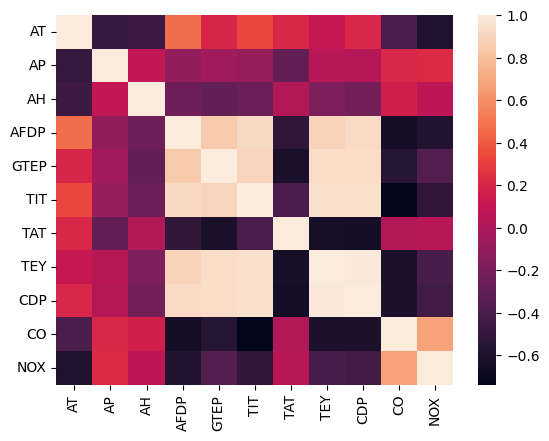

In [8]:
sns.heatmap(dfp.corr())

### Prepare data structure for spark

In [9]:
input_cols = df.columns
input_cols.remove('NOX')
input_cols

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']

In [10]:
vector_assembler = feature.VectorAssembler(inputCols = input_cols,
                                           outputCol = 'features')
df2 = vector_assembler.transform(dataset = df)

In [11]:
df2.show()

+--------+------+------+------+------+------+------+------+------+------+------+--------------------+
|      AT|    AP|    AH|  AFDP|  GTEP|   TIT|   TAT|   TEY|   CDP|    CO|   NOX|            features|
+--------+------+------+------+------+------+------+------+------+------+------+--------------------+
|  1.9532|1020.1|84.985|2.5304|20.116|1048.7|544.92|116.27|10.799|7.4491|113.25|[1.9532,1020.1,84...|
|  1.2191|1020.1|87.523|2.3937|18.584|1045.5| 548.5|109.18|10.347|6.4684|112.02|[1.2191,1020.1,87...|
| 0.94915|1022.2|78.335|2.7789|22.264|1068.8|549.95|125.88|11.256|3.6335|88.147|[0.94915,1022.2,7...|
|  1.0075|1021.7|76.942| 2.817|23.358|1075.2|549.63|132.21|11.702|3.1972|87.078|[1.0075,1021.7,76...|
|  1.2858|1021.6|76.732|2.8377|23.483|1076.2|549.68|133.58|11.737|2.3833|82.515|[1.2858,1021.6,76...|
|  1.8319|1021.7|76.411| 2.841|23.495|1076.4|549.92|133.58|11.829|2.0812|81.193|[1.8319,1021.7,76...|
|   2.074|1022.0|75.974|2.7981|22.945|1073.7|549.98|131.53|11.687|2.2529|83.171|[2

### Dataset split

In [12]:
splits = df2.randomSplit([0.7, 0.3], seed = 101)

In [13]:
df_tr = splits[0]
df_tst = splits[1]

In [14]:
df_tr.count()

5165

In [15]:
df_tst.count()

2219

### Modeling

In [16]:
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import feature

#### Linear Regression

In [17]:
lr = LinearRegression(labelCol = 'NOX')
lr_model = lr.fit(df_tr)

In [18]:
lr_model.coefficients

DenseVector([-1.5642, -0.318, -0.2524, -0.9052, 0.1939, 1.382, -0.8548, -2.4234, 8.7649, 2.6103])

In [19]:
lr_model.intercept

-388.41563146668244

In [20]:
lr_model.summary.coefficientStandardErrors

[0.04238483535086803,
 0.0170199312711927,
 0.00843055000449291,
 0.6435605927367861,
 0.06115870946984003,
 0.1248753643373593,
 0.1564139359101661,
 0.1290394059456014,
 1.8178826898724396,
 0.06157189407286876,
 34.4769353830434]

In [21]:
lr_model.summary.r2

0.6984970794733001

In [22]:
lr_model.summary.r2adj

0.6979120912689409

In [23]:
lr_model.summary.rootMeanSquaredError

6.115640884500553

In [24]:
lr_model.summary.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|  -8.96839669067878|
|-3.8627793536073796|
|  2.874119181377779|
| -4.370828630213495|
|  6.741081005649448|
| -4.895551134729466|
|  2.935589937784954|
| 11.242572535757546|
|-13.814809251439783|
| -4.204938642836247|
| -1.150566718168335|
|-3.1309270882355875|
| -0.462771358884261|
| -1.480480408065901|
| -4.368526197491157|
| -5.203989916985471|
|-1.5870479937222512|
| -1.167041978032053|
|-3.6254298117720225|
|-0.8221764127413067|
+-------------------+
only showing top 20 rows



In [25]:
pred = lr_model.transform(df_tst)

In [26]:
pred.show()

+--------+------+------+------+------+------+------+------+------+------+------+--------------------+------------------+
|      AT|    AP|    AH|  AFDP|  GTEP|   TIT|   TAT|   TEY|   CDP|    CO|   NOX|            features|        prediction|
+--------+------+------+------+------+------+------+------+------+------+------+--------------------+------------------+
| -5.8956|1034.1|70.851|4.3541|36.533|1100.0| 518.3|177.88|15.083|1.9988|56.206|[-5.8956,1034.1,7...|60.673683426599666|
| -5.8847|1033.6| 66.92|4.2815|36.218|1100.0|520.24|176.55|14.891|1.2721|56.124|[-5.8847,1033.6,6...| 59.79764158271553|
| -5.4839|1034.5|72.581|4.2569| 35.86|1100.0|520.94|176.09|14.838|2.1367|58.693|[-5.4839,1034.5,7...| 59.71699111924727|
| -5.4155|1034.6|58.816|4.0521|34.179|1099.9| 525.8|172.89|14.492|2.7617|63.743|[-5.4155,1034.6,5...| 64.97357662014082|
| -5.0675|1034.2|56.755|4.1073|34.732|1099.8|524.19|173.67|14.636|2.6749|62.076|[-5.0675,1034.2,5...| 65.51736826194883|
| -4.9758|1036.5|70.657|4.2498|3

In [27]:
evaluator = RegressionEvaluator(labelCol = 'NOX', metricName = 'r2')
evaluator.evaluate(pred)

0.704573645921791

#### Decision Tree Regression

In [28]:
dt = DecisionTreeRegressor(labelCol = 'NOX')
dtr_model = dt.fit(df_tr)

In [29]:
df_tr.columns[:-2]

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']

In [30]:
dtr_model.featureImportances

SparseVector(10, {0: 0.5386, 1: 0.0018, 2: 0.0106, 3: 0.2779, 4: 0.0103, 5: 0.0342, 6: 0.017, 7: 0.0085, 9: 0.1012})

In [31]:
dtr_model.featureImportances.toArray()

array([0.53859252, 0.00178208, 0.01059783, 0.27789723, 0.01032851,
       0.03415561, 0.01698441, 0.00846611, 0.        , 0.1011957 ])

In [32]:
dtr_model.featureImportances.toArray().tolist()

[0.5385925239233093,
 0.0017820820835477216,
 0.010597825028970383,
 0.27789722914102,
 0.010328510448363847,
 0.034155614264764385,
 0.016984408270299414,
 0.008466107120362264,
 0.0,
 0.10119569971936287]

In [33]:
import pandas as pd

In [34]:
pd.DataFrame(zip(df_tr.columns[:-2], dtr_model.featureImportances.toArray()))

,0,1
0,AT,0.538593
1,AP,0.001782
2,AH,0.010598
3,AFDP,0.277897
4,GTEP,0.010329
5,TIT,0.034156
6,TAT,0.016984
7,TEY,0.008466
8,CDP,0.000000
9,CO,0.101196


In [35]:
spark.createDataFrame(data = zip(df_tr.columns[:-2], dtr_model.featureImportances.toArray().tolist()),
                      schema = ['variables', 'importance']).show()

+---------+--------------------+
|variables|          importance|
+---------+--------------------+
|       AT|  0.5385925239233093|
|       AP|0.001782082083547...|
|       AH|0.010597825028970383|
|     AFDP|    0.27789722914102|
|     GTEP|0.010328510448363847|
|      TIT|0.034155614264764385|
|      TAT|0.016984408270299414|
|      TEY|0.008466107120362264|
|      CDP|                 0.0|
|       CO| 0.10119569971936287|
+---------+--------------------+



In [36]:
pred = dtr_model.transform(df_tst)

In [37]:
evaluator.evaluate(pred)

0.7990927688414038

#### Random Forest Regression

In [38]:
rfr = RandomForestRegressor(labelCol = 'NOX')
rfr_model = rfr.fit(df_tr)
pred = rfr_model.transform(df_tst)

In [39]:
evaluator.evaluate(pred)

0.8266529856781204

#### Gradient Boosted Trees Regression

In [40]:
gbtr = GBTRegressor(labelCol = 'NOX')
gbtr_model = gbtr.fit(df_tr)
pred = gbtr_model.transform(df_tst)

In [41]:
evaluator.evaluate(pred)

0.8637498037880095